In [1]:
import numpy as np
from scipy.integrate import odeint
import ORdmm_Land_em_coupling as model
import matplotlib.pyplot as plt

import importlib
importlib.reload(model)
import tqdm

## testing isometric coupled

100%|██████████| 700/700 [08:23<00:00,  1.39it/s]


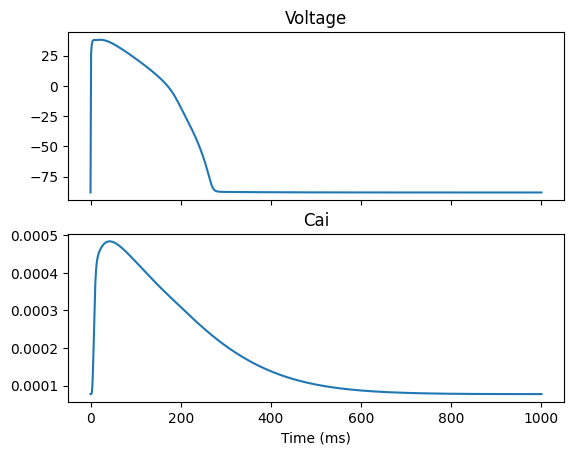

In [2]:
# Initial states
y0 = model.init_state_values()

# Parameters, celltype = epi
parameters = model.init_parameter_values(
    celltype=0, 
    isometric=1)
num_beats = 700  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y = odeint(model.rhs, y0, tsteps, args=(parameters,))
    y0 = y[-1]

# Extract the membrane potential
V_idx = model.state_indices('v')
V = y.T[V_idx]
Cai_idx = model.state_indices('cai')
Cai = y.T[Cai_idx]

# Extract monitored values
#monitor = np.array([model.monitor(r, t, parameters) for r, t in zip(y, tsteps)])
#Ta_idx = model.monitor_indices('Ta')
#Ta = monitor.T[Ta_idx]

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V)
ax[0].set_title('Voltage')
ax[1].plot(tsteps, Cai)
ax[1].set_title('Cai')
ax[1].set_xlabel('Time (ms)')
plt.show()


## testing isometric coupled with Gomez scaling

100%|██████████| 700/700 [08:32<00:00,  1.36it/s]


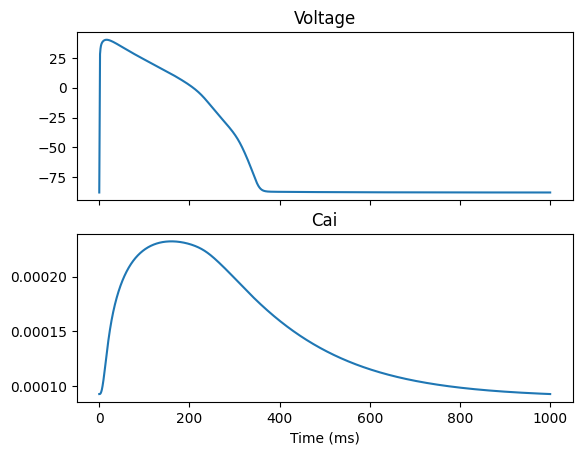

In [3]:
# Initial states
y0 = model.init_state_values()

# Parameters, celltype = epi
parameters = model.init_parameter_values(
    celltype=0, 
    isometric=1,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    Jrel_infp_sensitivity=0.80,)
    
num_beats = 700  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y = odeint(model.rhs, y0, tsteps, args=(parameters,))
    y0 = y[-1]

# Extract the membrane potential
V_idx = model.state_indices('v')
V = y.T[V_idx]
Cai_idx = model.state_indices('cai')
Cai = y.T[Cai_idx]

# Extract monitored values
#monitor = np.array([model.monitor(r, t, parameters) for r, t in zip(y, tsteps)])
#Ta_idx = model.monitor_indices('Ta')
#Ta = monitor.T[Ta_idx]

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V)
ax[0].set_title('Voltage')
ax[1].plot(tsteps, Cai)
ax[1].set_title('Cai')
ax[1].set_xlabel('Time (ms)')
plt.show()


## lambda 

/Users/agathebyraaum/Library/Python/3.8/lib/python/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


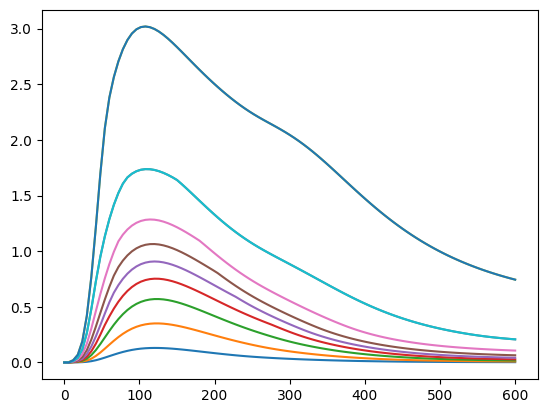

In [85]:

from scipy.integrate import odeint
import numpy as np 
import pylab

t = np.linspace(0,600,101)
SLvals = np.linspace(1.4,2.4,11)
lmbdavals = SLvals/1.85
force_ind = model.monitor_indices("Ta")     

for l in lmbdavals:
    init = model.init_state_values(lmbda=l) #lmbda=l, state val in Joakim's code
    p = model.init_parameter_values(lmbda_set=l)
    s = odeint(model.rhs,init,t,(p,))
    force = []
    for tn,sn in zip(t,s):
        m = model.monitor(sn,tn,p)
        force.append(m[force_ind])
    pylab.plot(t,force)

pylab.show()

100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


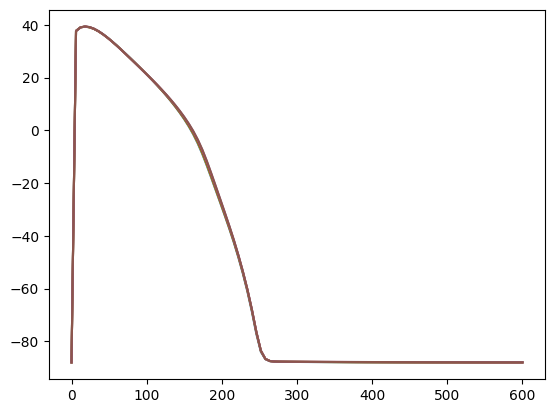

In [68]:

from scipy.integrate import odeint
import numpy as np 
import pylab

t = np.linspace(0,600,101)
SLvals = np.linspace(1.8,2.3,6)
lmbdavals = SLvals/1.85
v_ind = model.state_indices('v')

for l in lmbdavals:
    init = model.init_state_values() #lmbda=l, state val in Joakim's code
    p = model.init_parameter_values(lmbda=l)
    #s = odeint(model.rhs,init,t,(p,))
    V = []
    for i in tqdm.tqdm(range(10)):
        y = odeint(model.rhs, init, t, args=(p,))
        init = y[-1]
    V.append(y.T[v_ind])
    pylab.plot(t,V[0])

pylab.show()


In [7]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('init_values') if isfile(join('init_values', f))]

onlyfiles

['.DS_Store',
 'gomez_epi_ordmm.npy',
 'gomez_hetero_m_ordmm.npy',
 'gomez_endo_ordmm.npy',
 'control_m_ordmm.npy',
 'gomez_hetero_endo_ordmm.npy',
 'control_endo_ordmm.npy',
 'control_epi_ordmm.npy',
 'gomez_m_ordmm.npy',
 'gomez_hetero_epi_ordmm.npy']

In [6]:
import os 

lst = ['gomez_epi_ordmm.npy',
 'gomez_hetero_m_ordmm.npy',
 'gomez_endo_ordmm.npy',
 'control_m_ordmm.npy',
 'gomez_hetero_endo_ordmm.npy',
 'control_endo_ordmm.npy',
 'control_epi_ordmm.npy',
 'gomez_m_ordmm.npy',
 'gomez_hetero_epi_ordmm.npy']

for i in range(len(lst)):
    p = lst[i]
    y_load = np.load(f'init_values/{p}'
        )
    y0 = y_load[-1]

    path = os.path.join("init_values", p)
    np.save(path, y0, allow_pickle=True)
    print(f'Finished and saved {p}.')

Finished and saved control_endo_coupled_iso_090.npy.
Finished and saved control_endo_coupled_iso_095.npy.
Finished and saved gomez_hetero_endo_coupled_iso_100.npy.
Finished and saved gomez_endo_coupled_iso_100.npy.
Finished and saved gomez_endo_coupled_iso_110.npy.
Finished and saved gomez_endo_coupled_iso_105.npy.
Finished and saved gomez_m_coupled_iso_100.npy.
Finished and saved gomez_endo_coupled_iso_095.npy.
Finished and saved gomez_epi_coupled_iso_100.npy.
Finished and saved gomez_endo_coupled_iso_090.npy.
Finished and saved control_m_coupled_iso_100.npy.
Finished and saved control_endo_coupled_iso_105.npy.
Finished and saved control_endo_coupled_iso_110.npy.
Finished and saved control_endo_coupled_iso_100.npy.
Finished and saved control_epi_coupled_iso_100.npy.
Finished and saved gomez_hetero_epi_coupled_iso_100.npy.
Finished and saved gomez_hetero_m_coupled_iso_100.npy.
